# Prediccion de problemas cardiacos

https://www.canva.com/design/DAGhd2sCP1I/3DpDeeIm0dTAcmIJnda_cQ/edit

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Datasets/heart.csv'
# Download
df = pd.read_csv(path)
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Esto lo que hace es cambiar el tipado de las columnas categoricas de objeto a strings

In [3]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

df[categorical_columns] = df[categorical_columns].astype('string')

In [4]:
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


In [5]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())

Sex
M    725
F    193
Name: count, dtype: Int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64


In [8]:
categoricas = pd.pivot_table(df,
                             index=['Sex', 'ChestPainType', 'RestingECG'],
                             columns='HeartDisease',
                             aggfunc='size',
                             fill_value=0)
categoricas

HeartDisease                   0    1
Sex ChestPainType RestingECG         
F   ASY           LVH         10   12
                  Normal      16   22
                  ST           5    5
    ATA           LVH          7    2
                  Normal      40    2
                  ST           9    0
    NAP           LVH         15    0
                  Normal      27    4
                  ST           5    2
    TA            LVH          1    0
                  Normal       6    1
                  ST           2    0
M   ASY           LVH         11   69
                  Normal      44  202
                  ST          18   82
    ATA           LVH          9    5
                  Normal      72    9
                  ST          12    6
    NAP           LVH         19   13
                  Normal      57   35
                  ST           8   18
    TA            LVH         10    5
                  Normal       5   10
                  ST           2    4

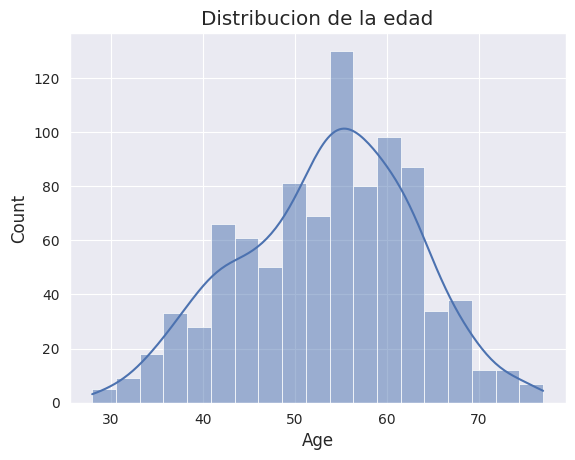

In [9]:
sns.histplot(df['Age'],kde=True)
plt.title('Distribucion de la edad')
plt.show()

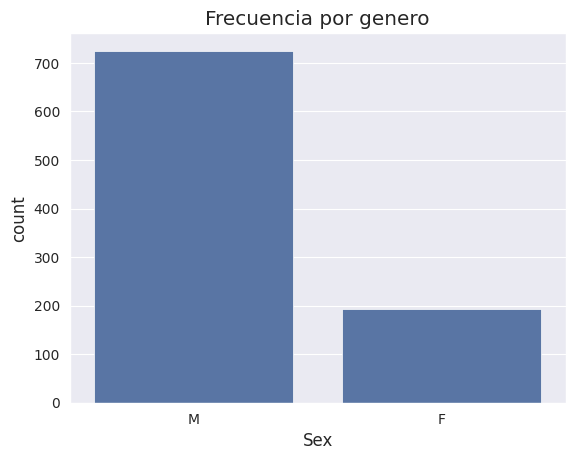

In [10]:
sns.countplot(data=df, x='Sex')
plt.title('Frecuencia por genero')
plt.show()

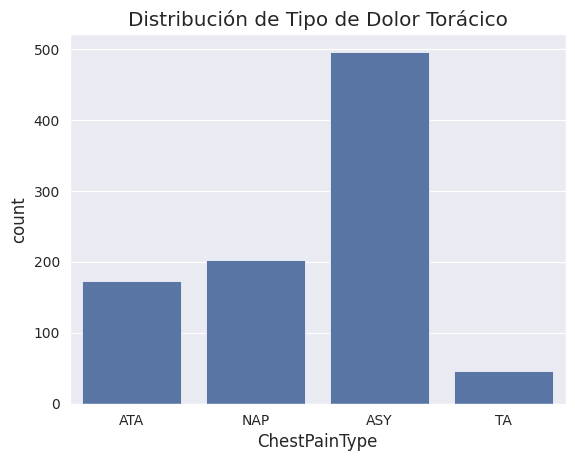

In [11]:
sns.countplot(data=df, x='ChestPainType')
plt.title('Distribución de Tipo de Dolor Torácico')
plt.show()

Ahora se analizara si las variables tienen alguna relacion entre si a traves de una matriz de correlacion

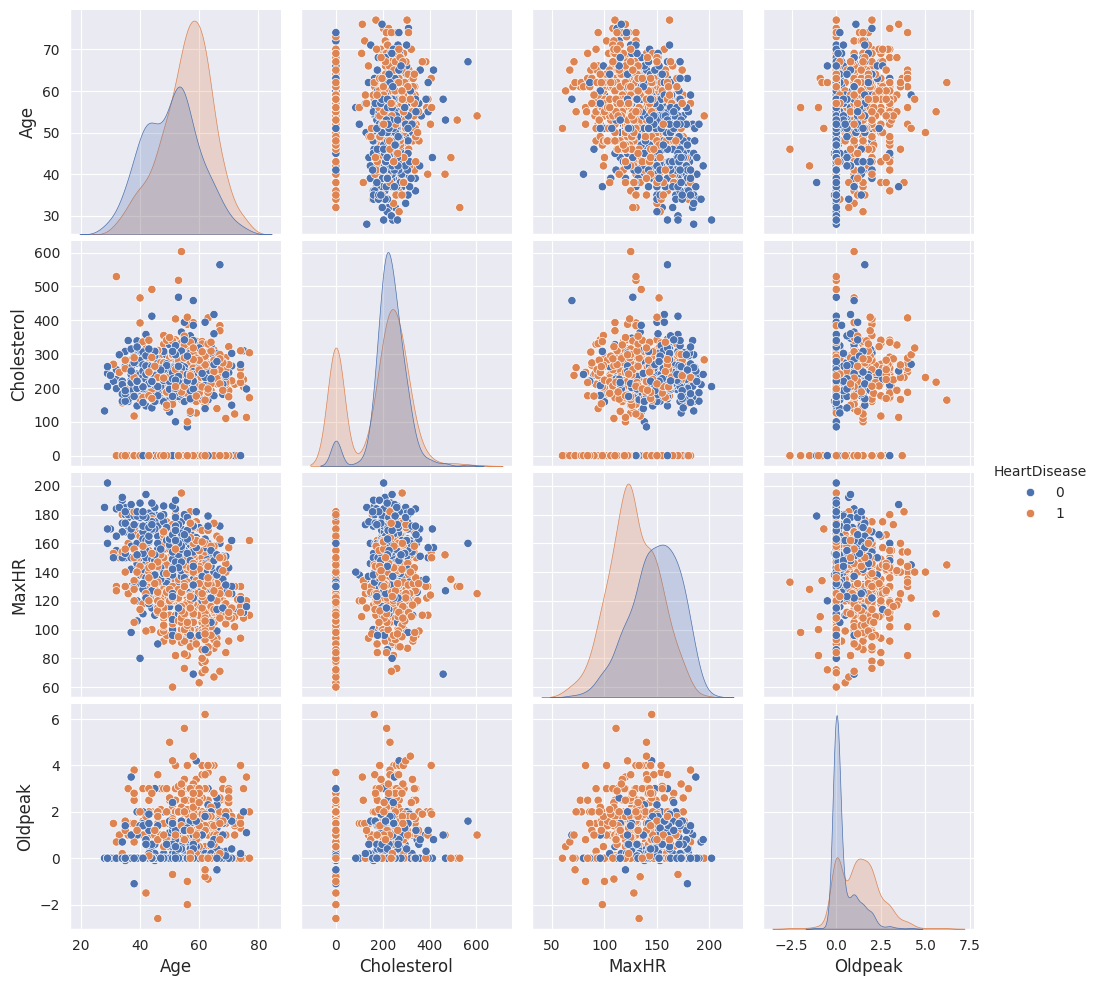

In [12]:
sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']], hue='HeartDisease')

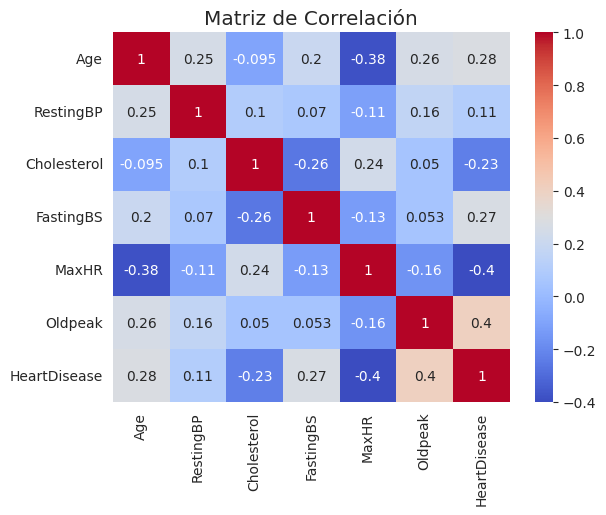

In [13]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Text(0, 0.5, 'MaxHR')

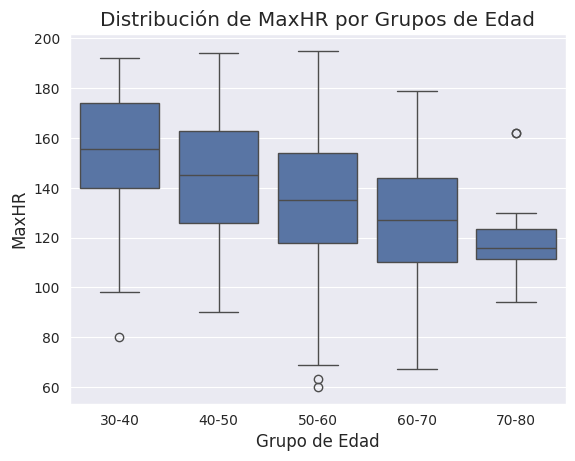

In [14]:
df_ages = df.copy()
df_ages['AgeGroup'] = pd.cut(df['Age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
sns.boxplot(x='AgeGroup', y='MaxHR', data=df_ages)
plt.title('Distribución de MaxHR por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('MaxHR')

Text(0.5, 1.0, 'Distribución de Oldpeak por HeartDisease')

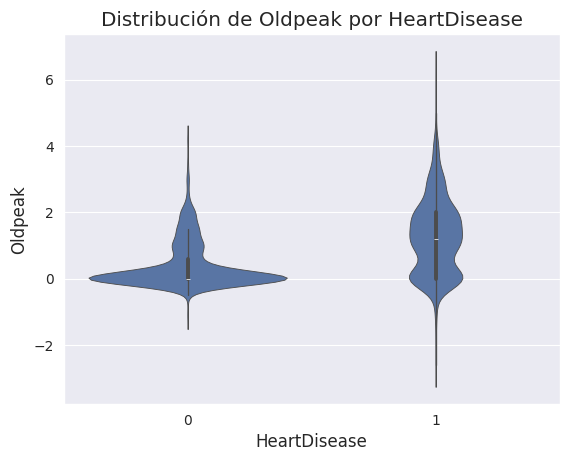

In [15]:
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title('Distribución de Oldpeak por HeartDisease')

Text(0.5, 1.0, 'Colesterol por Tipo de Dolor Torácico')

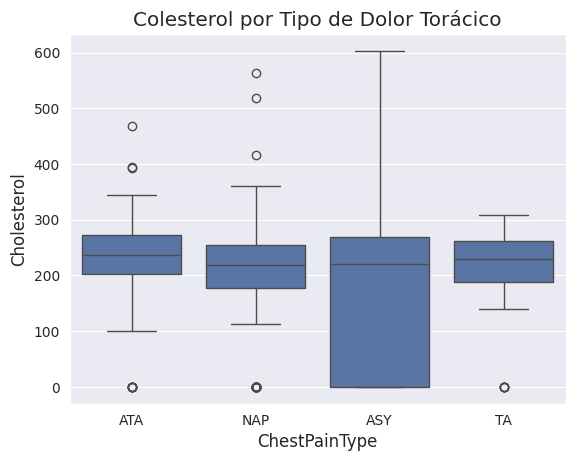

In [16]:
sns.boxplot(data=df, x='ChestPainType', y='Cholesterol')
plt.title('Colesterol por Tipo de Dolor Torácico')

Text(0.5, 1.0, 'Distribución de Género según la Enfermedad Cardíaca')

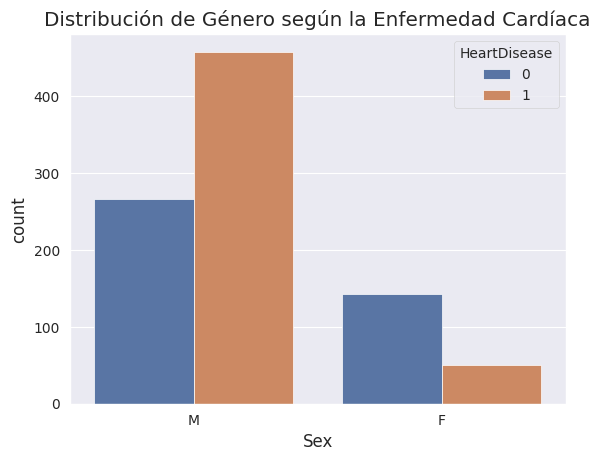

In [17]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Distribución de Género según la Enfermedad Cardíaca')

Text(0.5, 1.0, 'Distribución de Tipo de Dolor Torácico según la Enfermedad Cardíaca')

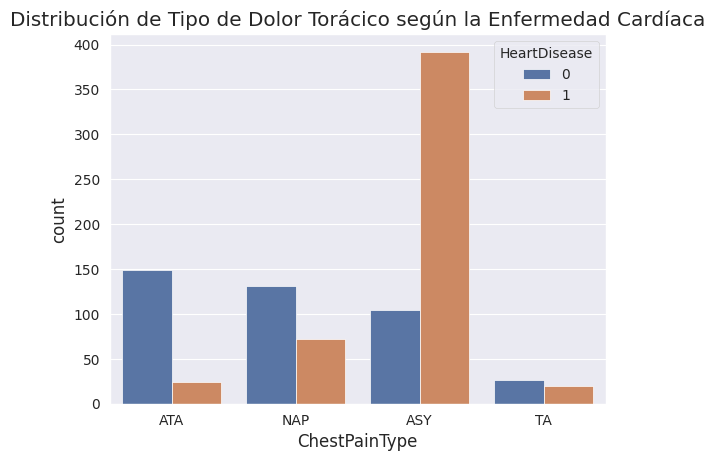

In [18]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Distribución de Tipo de Dolor Torácico según la Enfermedad Cardíaca')

# Aplicacion de algoritmos de Clasificacion para predecir si un paciente tiene una enfermedad del corazon

In [19]:
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

Preprocesamiento requerido para la aplicacion de modelos de clasificacion

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding para transformar las variables categóricas y asi poder ejecutar los modelos
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


Creacion de la pipeline para evaluar los hiperparametros mas optimos a evaluar para cada modelo

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Seleccion del data y el target
X = df.values[:,:-1]
y = df.values[:,-1]

#Eleccion del conjunto de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#Eleccion de modelos a evaluar
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "NaiveBayes": GaussianNB()
}

# Pipeline para encontrar los mejores hiperparametros para los modelos
models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [100, 200,300],
            "classifier__max_depth": [None, 10, 20,30]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10],
            "classifier__penalty": ["l2"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [3, 5, 7],
            "classifier__weights": ["uniform", "distance"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [3, 5],
            "classifier__learning_rate": [0.01, 0.1]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": { "classifier__var_smoothing": [1e-9, 1e-8, 1e-7] }
    }
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

hiper = []
for name, mp in models_params.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", mp["model"])
    ])

    grid = GridSearchCV(pipeline, mp["params"], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    hiper.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Best CV Accuracy": grid.best_score_
    })

# DataFrame con resultados de los hiperparametros mas optimos para cada modelo evaluado
hiper_results_df = pd.DataFrame(hiper).sort_values(by="Best CV Accuracy", ascending=False)
print(hiper_results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                Model                                        Best Params  \
2                 SVM  {'classifier__C': 1, 'classifier__kernel': 'rbf'}   
0        RandomForest  {'classifier__max_depth': None, 'classifier__n...   
4             XGBoost  {'classifier__learning_rate': 0.01, 'classifie...   
3                 KNN  {'classifier__n_neighbors': 5, 'classifier__we...   
5          NaiveBayes               {'classifier__var_smoothing': 1e-09}   
1  LogisticRegression  {'classifier__C': 0.1, 'classifier__penalty': ...   

   Best CV Accuracy  
2          0.871795  
0          0.869231  
4          0.858974  
3          0.857692  
5          0.856410  
1          0.855128  


Mejor visualizacion de Hiperparametros

In [23]:
for _, row in hiper_results_df.iterrows():
    print(f"\n🔍 {row['Model']}")
    for param, value in row["Best Params"].items():
        print(f"   {param}: {value}")
    print(f"   Best CV Accuracy: {row['Best CV Accuracy']:.4f}")


🔍 SVM
   classifier__C: 1
   classifier__kernel: rbf
   Best CV Accuracy: 0.8718

🔍 RandomForest
   classifier__max_depth: None
   classifier__n_estimators: 200
   Best CV Accuracy: 0.8692

🔍 XGBoost
   classifier__learning_rate: 0.01
   classifier__max_depth: 3
   classifier__n_estimators: 200
   Best CV Accuracy: 0.8590

🔍 KNN
   classifier__n_neighbors: 5
   classifier__weights: uniform
   Best CV Accuracy: 0.8577

🔍 NaiveBayes
   classifier__var_smoothing: 1e-09
   Best CV Accuracy: 0.8564

🔍 LogisticRegression
   classifier__C: 0.1
   classifier__penalty: l2
   Best CV Accuracy: 0.8551


Creacion de la pipeline para hacer predicciones por cada modelos almacenando las metricas en un DataFrame

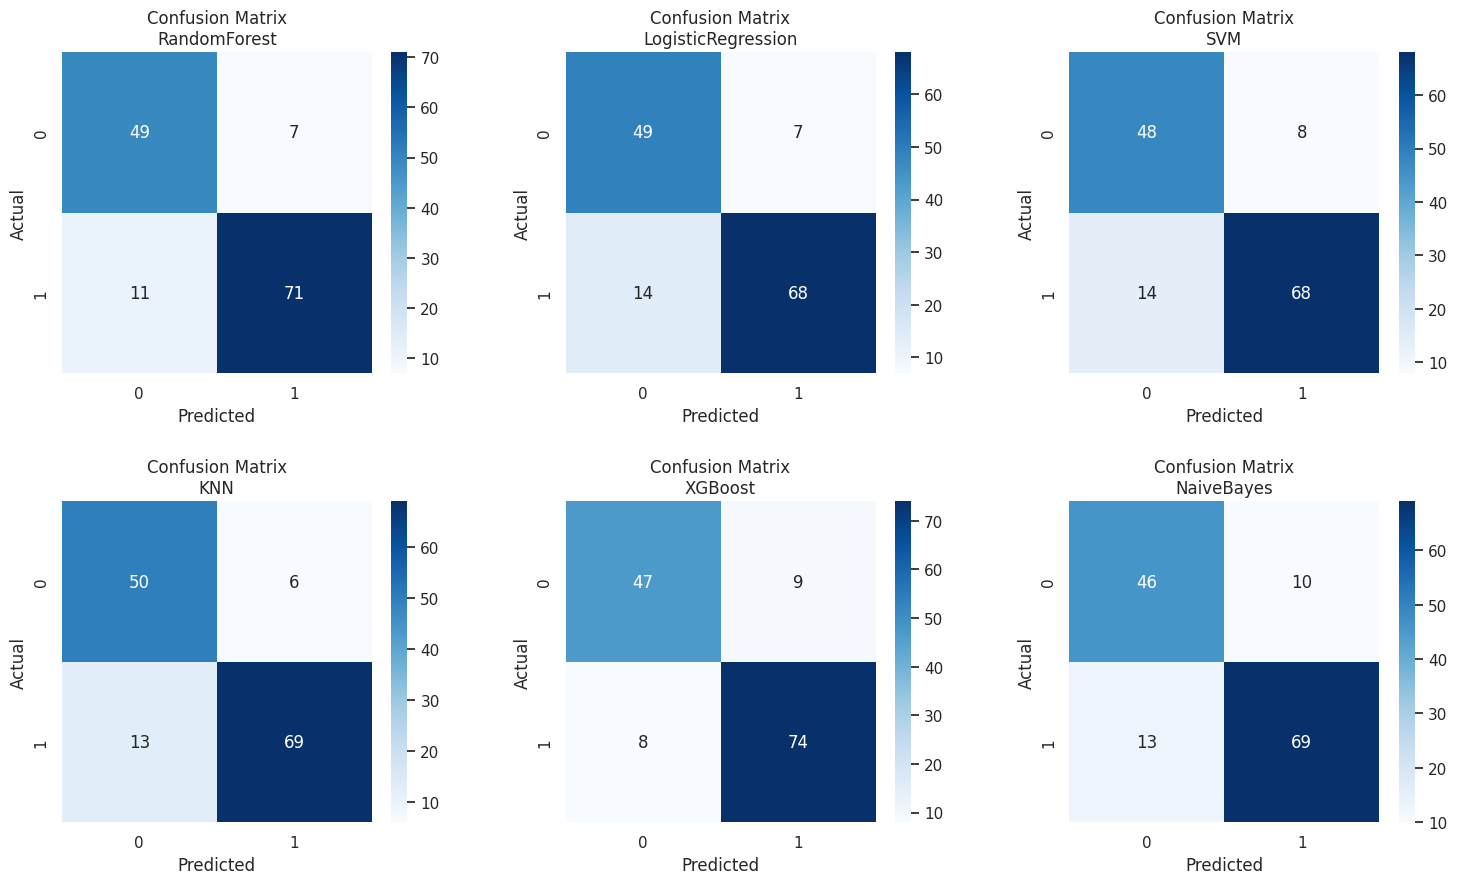

In [24]:
#Creacion del diccionario que contiene los mejores hiperparametros encontrados con el gridsearch
best_models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=None),
    "LogisticRegression": LogisticRegression(C=0.1, penalty='l2', max_iter=1000),
    "SVM": SVC(C=0.1, kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200,
                                      eval_metric='logloss'),
    "NaiveBayes": GaussianNB(var_smoothing=1e-9)
}
#Creacion de la pipeline que ejecutará primero el scaler y luego evaluará el modelo
pipelines = {
    name: Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    for name, model in best_models.items()
}

# Ejecucion de los modelos y evaluacion de metricas para guardarlo en un dataframe de resultados. Grafica tambien la matriz de confusion para cada modelo
results = []
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx,(name, pipeline) in enumerate(pipelines.items()):
    # Fit y predicción
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average ='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average ='weighted',zero_division=0)

    # Cross-validation (accuracy)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean = cv_scores.mean()

    #Matriz de confusion
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix\n{name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")


    # Guardar resultados
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "Test Precision": prec,
        "Test Recall": recall,
        "CV Accuracy": cv_mean
    })

for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Crear DataFrame de los resultados para una mejor visualizacion
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)

In [25]:
print(results_df)

                Model  Test Accuracy  Test Precision  Test Recall  CV Accuracy
4             XGBoost       0.876812        0.876543     0.876812     0.858974
0        RandomForest       0.869565        0.872278     0.869565     0.864103
3                 KNN       0.862319        0.868728     0.862319     0.856410
1  LogisticRegression       0.847826        0.854364     0.847826     0.855128
2                 SVM       0.840580        0.845821     0.840580     0.860256
5          NaiveBayes       0.833333        0.835372     0.833333     0.856410


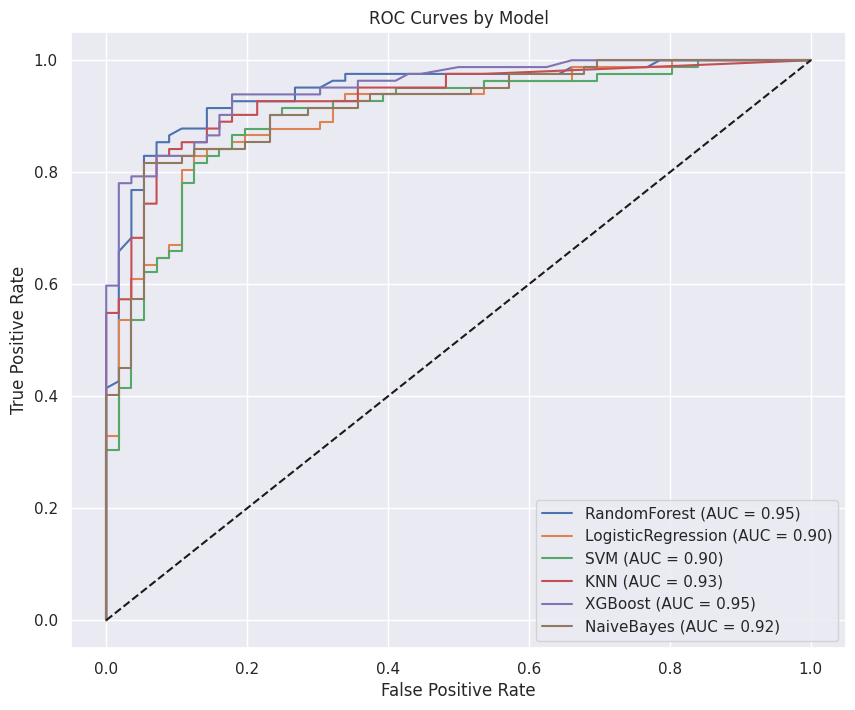

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

    # Obtener probabilidades (solo para clasificadores que soportan predict_proba)
    if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:
        # Para SVM sin probas, usar decision_function
        y_scores = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Línea diagonal (modelo aleatorio)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Deep Learning Aplicattion

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.05),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,138 (1.14 MB)

 Trainable params: 299,138 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

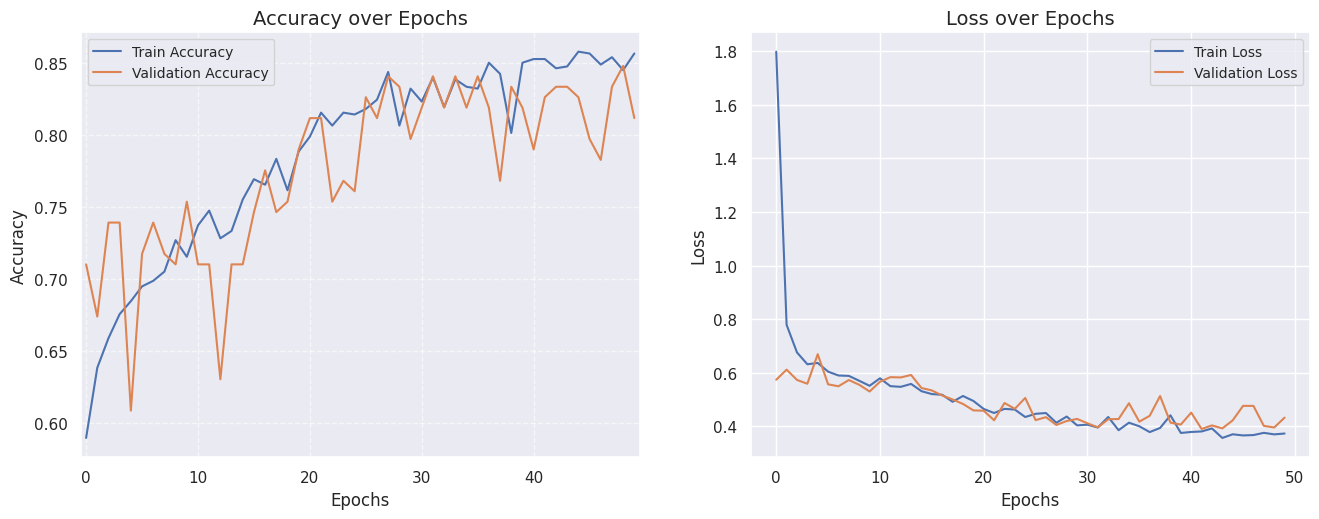

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

plt.figure(figsize=(14, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.margins(x=0.01)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

# Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


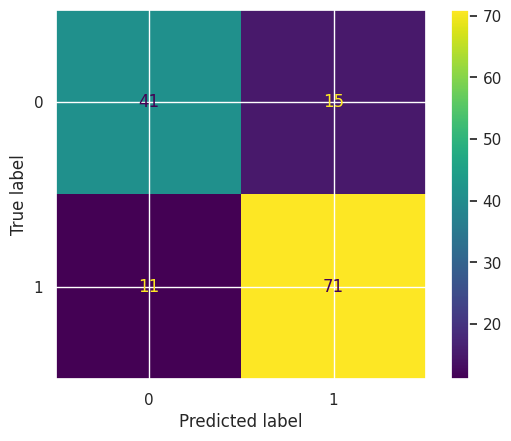

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicción de probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades a clases (0 o 1)
y_pred_class = np.argmax(y_pred_prob, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)

# Mostrarla de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# AUC ROC Curve

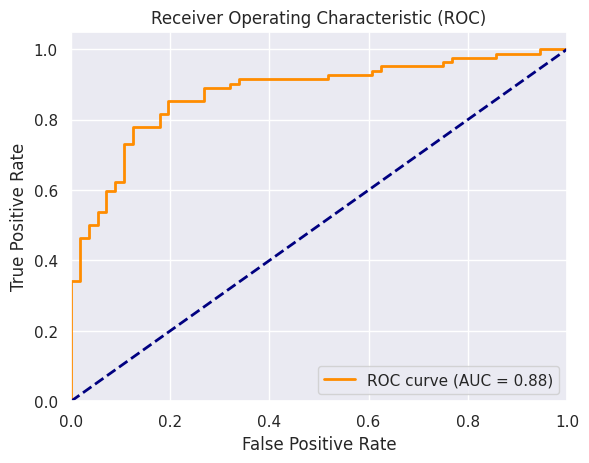

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()